<a href="https://colab.research.google.com/github/gorilla15a/property-valuation-multimodal/blob/main/notebooks/preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn openpyxl


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [2]:
!git clone https://github.com/gorilla15a/property-valuation-multimodal.git


Cloning into 'property-valuation-multimodal'...
remote: Enumerating objects: 79, done.
remote: Counting objects: 100% (79/79), done.
remote: Compressing objects: 100% (69/69), done.
remote: Total 79 (delta 23), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (79/79), 2.56 MiB | 15.25 MiB/s, done.
Resolving deltas: 100% (23/23), done.


In [3]:
%cd property-valuation-multimodal

/content/property-valuation-multimodal


In [4]:
!ls

data  notebooks  outputs  README.md  src


# EDA

In [5]:
train = pd.read_excel("data/raw/train(1).xlsx")
test  = pd.read_excel("data/raw/test2.xlsx")

In [6]:
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,9117000170,20150505T000000,268643,4,2.25,1810,9240,2.0,0,0,...,7,1810,0,1961,0,98055,47.4362,-122.187,1660,9240
1,6700390210,20140708T000000,245000,3,2.50,1600,2788,2.0,0,0,...,7,1600,0,1992,0,98031,47.4034,-122.187,1720,3605
2,7212660540,20150115T000000,200000,4,2.50,1720,8638,2.0,0,0,...,8,1720,0,1994,0,98003,47.2704,-122.313,1870,7455
3,8562780200,20150427T000000,352499,2,2.25,1240,705,2.0,0,0,...,7,1150,90,2009,0,98027,47.5321,-122.073,1240,750
4,7760400350,20141205T000000,232000,3,2.00,1280,13356,1.0,0,0,...,7,1280,0,1994,0,98042,47.3715,-122.074,1590,8071


In [7]:
train.shape

(16209, 21)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16209 entries, 0 to 16208
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             16209 non-null  int64  
 1   date           16209 non-null  object 
 2   price          16209 non-null  int64  
 3   bedrooms       16209 non-null  int64  
 4   bathrooms      16209 non-null  float64
 5   sqft_living    16209 non-null  int64  
 6   sqft_lot       16209 non-null  int64  
 7   floors         16209 non-null  float64
 8   waterfront     16209 non-null  int64  
 9   view           16209 non-null  int64  
 10  condition      16209 non-null  int64  
 11  grade          16209 non-null  int64  
 12  sqft_above     16209 non-null  int64  
 13  sqft_basement  16209 non-null  int64  
 14  yr_built       16209 non-null  int64  
 15  yr_renovated   16209 non-null  int64  
 16  zipcode        16209 non-null  int64  
 17  lat            16209 non-null  float64
 18  long  

No null rows

In [9]:
train.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.620900e+04,1.620900e+04,16209.00000,16209.000000,16209.000000,1.620900e+04,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000
mean,4.575771e+09,5.374703e+05,3.36782,2.113054,2073.274601,1.486767e+04,1.498828,0.006971,0.234253,3.407860,7.652971,1784.754396,288.520205,1971.152755,82.738108,98077.974767,47.560707,-122.214003,1983.152261,12735.572707
std,2.874661e+09,3.603036e+05,0.93327,0.765242,907.009491,3.882570e+04,0.543032,0.083206,0.763152,0.651553,1.171050,821.820844,438.598910,29.372698,397.861148,53.355282,0.138340,0.140093,681.905161,26933.162012
min,1.000102e+06,7.500000e+04,0.00000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.159300,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.200000e+05,3.00000,1.500000,1430.000000,5.004000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98033.000000,47.472500,-122.328000,1480.000000,5098.000000
50%,3.904950e+09,4.500000e+05,3.00000,2.250000,1910.000000,7.599000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.572400,-122.230000,1840.000000,7620.000000
75%,7.304301e+09,6.400000e+05,4.00000,2.500000,2550.000000,1.063100e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2200.000000,560.000000,1997.000000,0.000000,98117.000000,47.678200,-122.125000,2360.000000,10053.000000
max,9.900000e+09,7.700000e+06,33.00000,8.000000,12050.000000,1.164794e+06,3.500000,1.000000,4.000000,5.000000,13.000000,8860.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


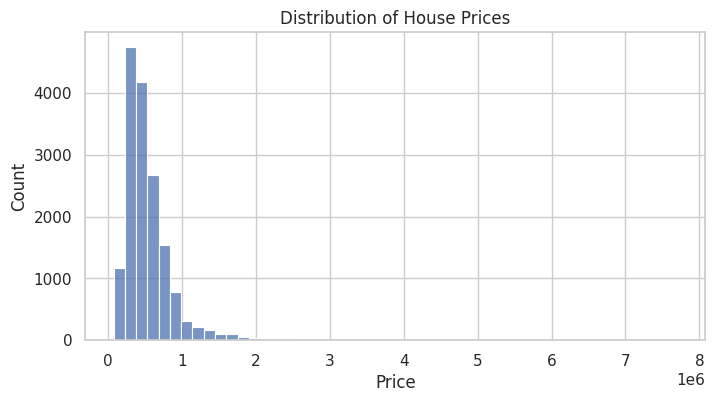

In [10]:
plt.figure(figsize=(8,4))
sns.histplot(train["price"], bins=50)
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()


This is right skewed as very few properties are of premium prices this might lead to high variance so it is better to log transform it for better multi regression method application

Log tranformation

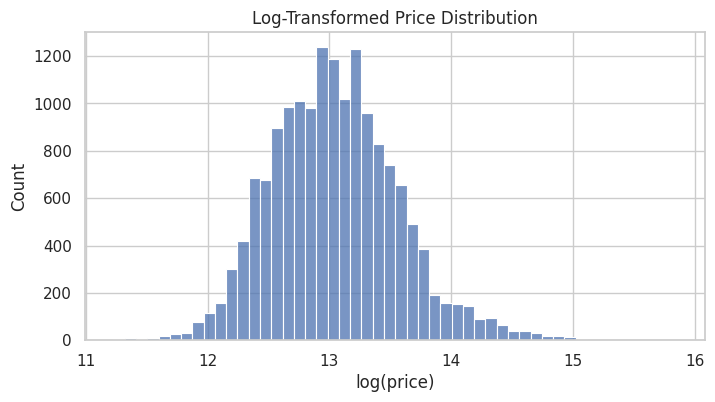

In [11]:
train["log_price"] = np.log1p(train["price"])
plt.figure(figsize=(8,4))
sns.histplot(train["log_price"], bins=50)
plt.title("Log-Transformed Price Distribution")
plt.xlabel("log(price)")
plt.ylabel("Count")
plt.show()


Now the data is normally distributed.

# Univariate Analysis

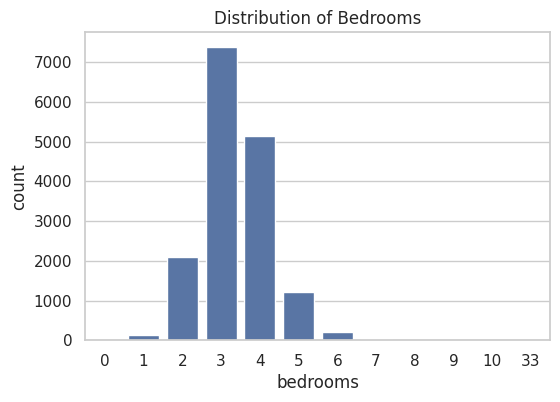

In [12]:
plt.figure(figsize=(6,4))
sns.countplot(x="bedrooms", data=train)
plt.title("Distribution of Bedrooms")
plt.show()


Most houses have 3-4 bedrooms.

In [14]:
train['bathrooms'].value_counts()

,count
bathrooms,
2.50,4064
1.00,2891
1.75,2283
2.25,1532
2.00,1424
1.50,1094
2.75,913
3.00,547
3.50,544


Number of bathrooms also contain fractional values like 1.75,3.5 indicating for common bathrooms, luxurious bathrooms and attached bathrooms.

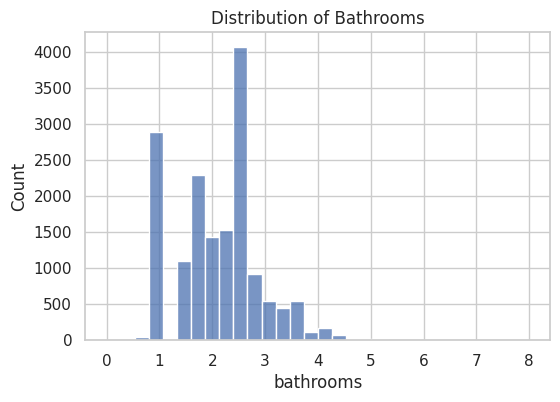

In [26]:
plt.figure(figsize=(6,4))
sns.histplot(train["bathrooms"], bins=30)
plt.title("Distribution of Bathrooms")
plt.show()

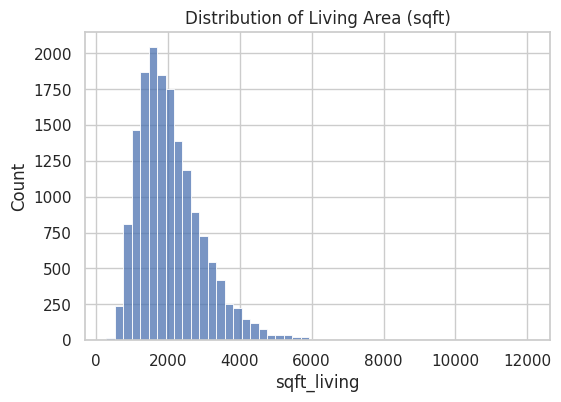

In [16]:
plt.figure(figsize=(6,4))
sns.histplot(train["sqft_living"], bins=50)
plt.title("Distribution of Living Area (sqft)")
plt.show()

Living area is right-skewed, with a small number of very large houses.

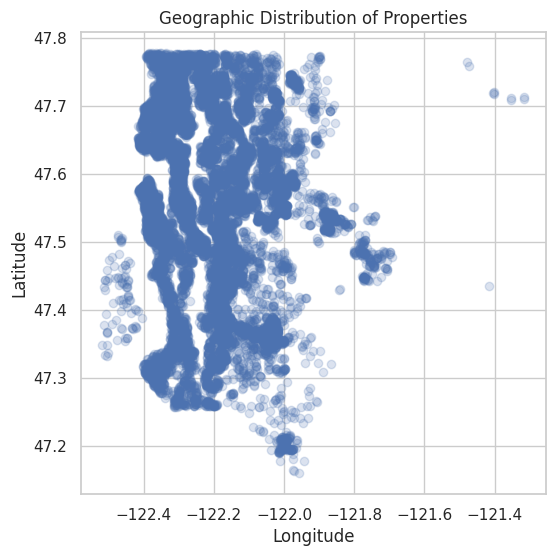

In [17]:
plt.figure(figsize=(6,6))
plt.scatter(train["long"], train["lat"], alpha=0.2)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographic Distribution of Properties")
plt.show()


# Bivariate Analysis

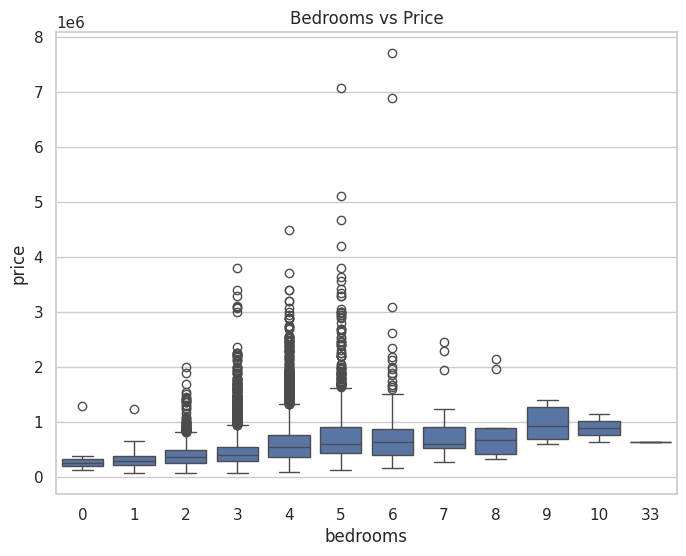

In [20]:
plt.figure(figsize=(8,6))
sns.boxplot(x="bedrooms", y="price", data=train)
plt.title("Bedrooms vs Price")
plt.show()

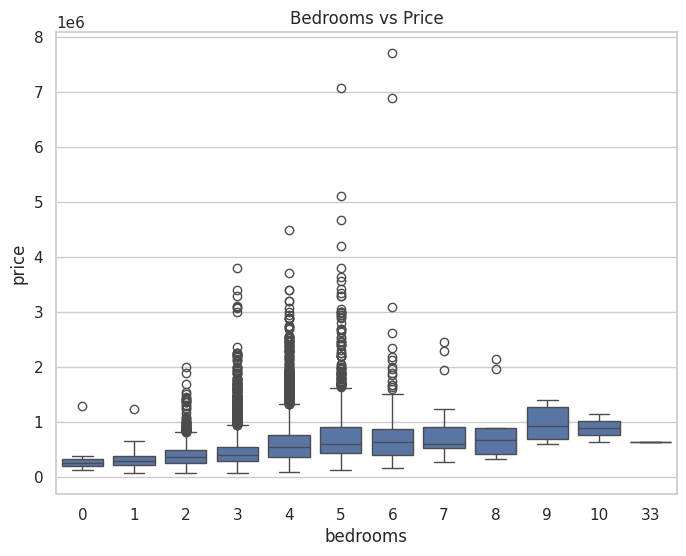

In [22]:
plt.figure(figsize=(8,6))
sns.boxplot(x="bedrooms", y="price", data=train)
plt.title("Bedrooms vs Price")
plt.show()

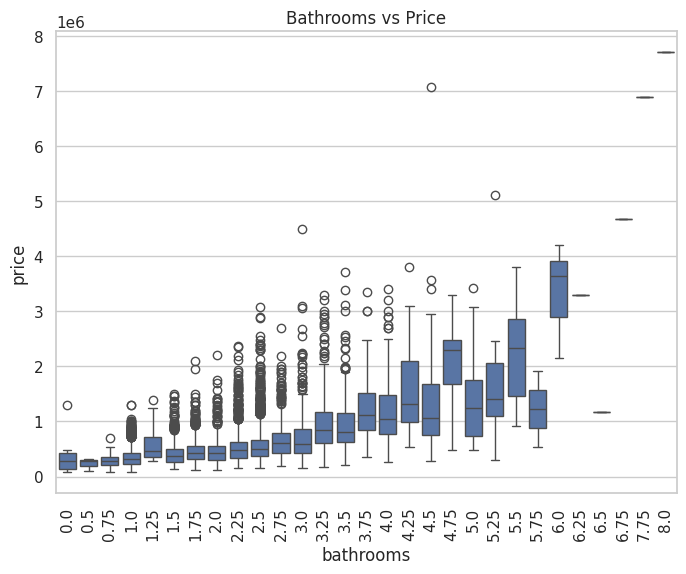

In [29]:
plt.figure(figsize=(8,6))
sns.boxplot(x="bathrooms", y="price", data=train)
plt.xticks(rotation=90)
plt.title("Bathrooms vs Price")
plt.show()

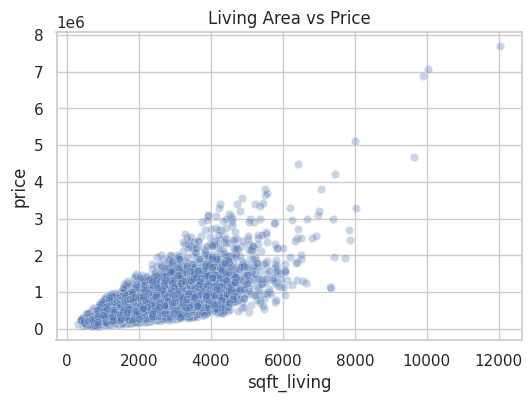

In [30]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x="sqft_living", y="price",
    data=train, alpha=0.3
)
plt.title("Living Area vs Price")
plt.show()


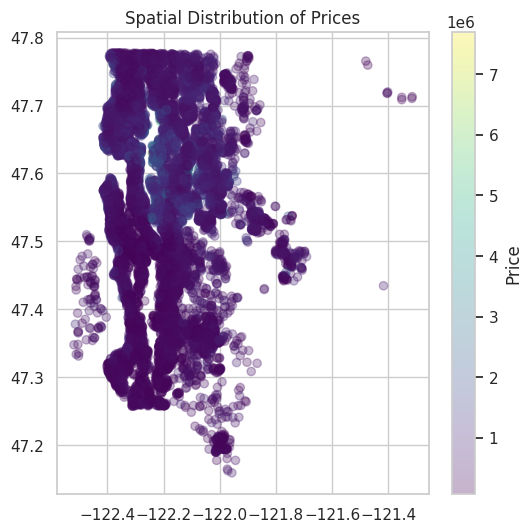

In [31]:
plt.figure(figsize=(6,6))
plt.scatter(train["long"], train["lat"], c=train["price"], cmap="viridis", alpha=0.3)
plt.colorbar(label="Price")
plt.title("Spatial Distribution of Prices")
plt.show()

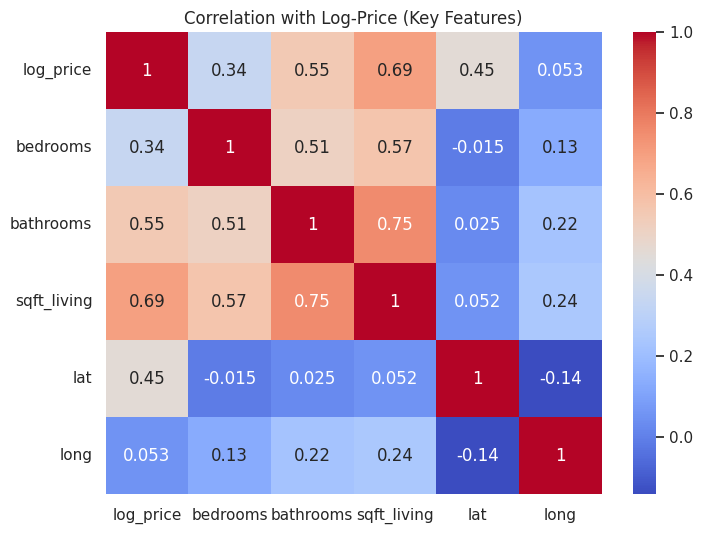

In [32]:
corr_features = [
    "log_price", "bedrooms", "bathrooms",
    "sqft_living", "lat", "long"
]

plt.figure(figsize=(8,6))
sns.heatmap(train[corr_features].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation with Log-Price (Key Features)")
plt.show()

# Geospatial Proxy Analysis

In [33]:
train["density_proxy"] = train["sqft_living15"] / train["sqft_lot15"]

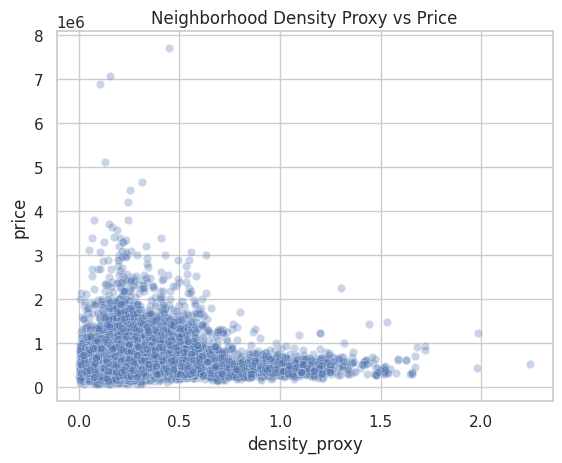

In [34]:
sns.scatterplot(x="density_proxy", y="price", data=train, alpha=0.3)
plt.title("Neighborhood Density Proxy vs Price")
plt.show()

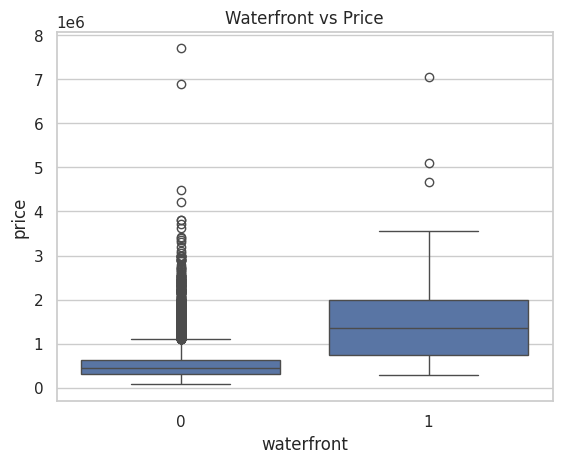

In [35]:
sns.boxplot(x="waterfront", y="price", data=train)
plt.title("Waterfront vs Price")
plt.show()

In [37]:
train_eda = train.copy()
train_eda.to_csv("data/processed/train_eda.csv", index=False)
test.to_csv("data/processed/test_eda.csv", index=False)